In [1]:
import pandas as pd
df = pd.read_csv('accord_sedan.csv')

In [2]:
df.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         417 non-null    int64 
 1   mileage       417 non-null    int64 
 2   year          417 non-null    int64 
 3   trim          417 non-null    object
 4   engine        417 non-null    object
 5   transmission  417 non-null    object
dtypes: int64(3), object(3)
memory usage: 19.7+ KB


In [4]:
df.describe()

,price,mileage,year
count,417.000000,417.000000,417.0
mean,12084.242206,89725.779376,2006.0
std,2061.430034,25957.872271,0.0
min,6900.000000,19160.000000,2006.0
25%,10779.000000,71844.000000,2006.0
50%,11995.000000,89900.000000,2006.0
75%,13000.000000,106705.000000,2006.0
max,18995.000000,149269.000000,2006.0


In [5]:
df.isnull().sum()

price           0
mileage         0
year            0
trim            0
engine          0
transmission    0
dtype: int64

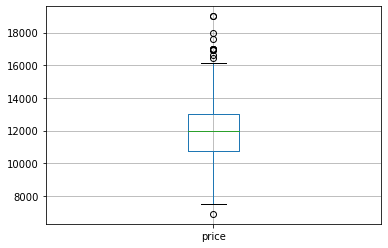

In [6]:
import numpy as np
boxplot1 = df.boxplot(column=['price'])

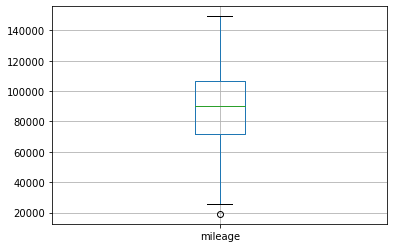

In [7]:
boxplot2= df.boxplot(column=['mileage'])

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'mileage')

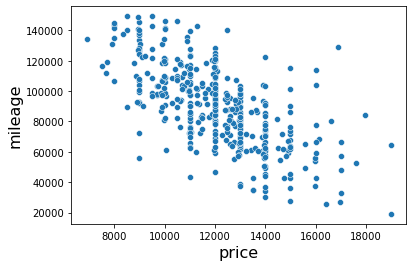

In [12]:
sns.scatterplot(x="price", y="mileage", data=df)
plt.xlabel("price", size=16)
plt.ylabel("mileage", size=16)



Text(0, 0.5, 'p')

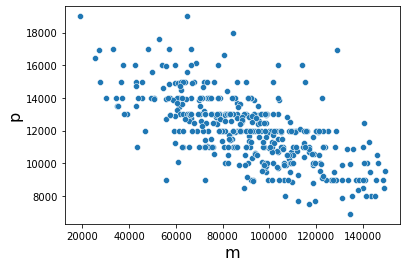

In [13]:
sns.scatterplot(y="price", x="mileage",data=df)
plt.xlabel("m", size=16)
plt.ylabel("p", size=16)

In [14]:
std1 = df['price'].std() 

In [15]:
mean1 = df['price'].mean() 

In [16]:
df['isOutlierPrice'] = 0
df['isOutlierMileage'] = 0

In [17]:
df

,price,mileage,year,trim,engine,transmission,isOutlierPrice,isOutlierMileage
0,14995,67697,2006,ex,4 Cyl,Manual,0,0
1,11988,73738,2006,ex,4 Cyl,Manual,0,0
2,11999,80313,2006,lx,4 Cyl,Automatic,0,0
3,12995,86096,2006,lx,4 Cyl,Automatic,0,0
4,11333,79607,2006,lx,4 Cyl,Automatic,0,0
...,...,...,...,...,...,...,...,...
412,12456,67564,2006,lx,4 Cyl,Automatic,0,0
413,10995,69775,2006,ex,4 Cyl,Automatic,0,0
414,16000,77997,2006,exl,4 Cyl,Automatic,0,0
415,14700,61892,2006,ex,4 Cyl,Automatic,0,0


In [18]:
st1 = mean1 - 2*std1
st2 = mean1 + 2*std1

In [27]:
df.loc[(df.price < st1) | (df.price > st2) , 'isOutlierPrice' ] = 1

In [28]:
df

,price,mileage,year,trim,engine,transmission,isOutlierPrice,isOutlierMileage
0,14995,67697,2006,ex,4 Cyl,Manual,0,0
1,11988,73738,2006,ex,4 Cyl,Manual,0,0
2,11999,80313,2006,lx,4 Cyl,Automatic,0,0
3,12995,86096,2006,lx,4 Cyl,Automatic,0,0
4,11333,79607,2006,lx,4 Cyl,Automatic,0,0
...,...,...,...,...,...,...,...,...
412,12456,67564,2006,lx,4 Cyl,Automatic,0,0
413,10995,69775,2006,ex,4 Cyl,Automatic,0,0
414,16000,77997,2006,exl,4 Cyl,Automatic,0,0
415,14700,61892,2006,ex,4 Cyl,Automatic,0,0


In [31]:
df['isOutlierPrice'].value_counts()
df['isOutlierMileage'].value_counts()

0    417
Name: isOutlierMileage, dtype: int64

In [29]:
st1

7961.382138299103

In [22]:
st2

16207.102274170922

In [32]:
std2 = df['mileage'].std() 
mean2 = df['mileage'].mean() 
st3 = mean2 - 2*std2
st4 = mean2 + 2*std2

In [33]:
df.loc[(df.mileage < st3) | (df.mileage > st4) , 'isOutlierMileage' ] = 1

In [34]:
df['isOutlierMileage'].value_counts()

0    393
1     24
Name: isOutlierMileage, dtype: int64

Text(0, 0.5, 'p')

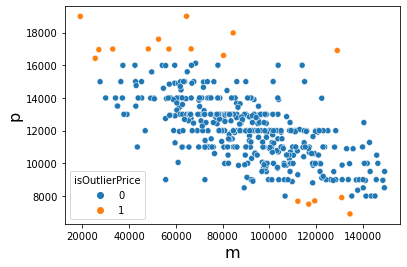

In [40]:
sns.scatterplot(y="price", x="mileage",hue = "isOutlierPrice" ,data=df)
plt.xlabel("m", size=16)
plt.ylabel("p", size=16)

Text(0, 0.5, 'p')

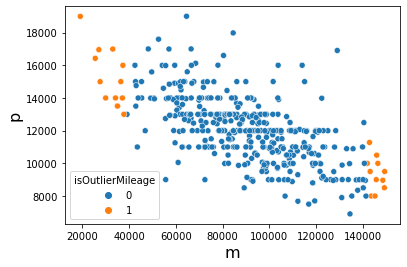

In [41]:
sns.scatterplot(y="price", x="mileage",hue = "isOutlierMileage" ,data=df)
plt.xlabel("m", size=16)
plt.ylabel("p", size=16)

In [57]:
df1 = pd.read_csv('TB_burden_countries_2014-09-29 (3).csv')

In [58]:
df1.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,...,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,source_tbhiv,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,327.0,112.0,655.0,...,0.35,0.22,0.52,41.0,25.0,60.0,Model,20.0,13.0,32.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,359.0,172.0,613.0,...,0.36,0.19,0.58,45.0,24.0,73.0,Model,97.0,77.0,120.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,387.0,169.0,693.0,...,0.37,0.19,0.62,51.0,26.0,86.0,Model,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,412.0,186.0,724.0,...,0.38,0.20,0.63,58.0,30.0,95.0,Model,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,431.0,199.0,751.0,...,0.40,0.21,0.64,65.0,35.0,100.0,Model,NaN,NaN,NaN


In [59]:
df1.describe()

,iso_numeric,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,e_prev_num,e_prev_num_lo,e_prev_num_hi,e_mort_exc_tbhiv_100k,...,e_tbhiv_prct_hi,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,c_cdr,c_cdr_lo,c_cdr_hi
count,4903.000000,4903.000000,4.903000e+03,4892.000000,4892.000000,4892.000000,4.892000e+03,4.892000e+03,4.892000e+03,4902.000000,...,3457.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,4476.000000,4476.000000,4476.000000
mean,433.487457,2001.042219,2.899179e+07,207.694422,93.683299,378.137001,6.914368e+04,4.366106e+04,1.064607e+05,16.245420,...,11.544342,38.941043,31.168524,48.023050,5909.707473,4611.192352,7552.394668,67.570706,57.608038,83.015950
std,255.202944,6.643548,1.177827e+08,269.720954,138.015090,501.059424,3.304527e+05,2.729764e+05,4.152786e+05,23.916259,...,17.518341,119.302756,96.875516,145.889395,23180.013244,18886.813523,28972.612879,26.411285,23.592254,45.020396
min,4.000000,1990.000000,1.129000e+03,0.260000,0.080000,0.540000,0.000000e+00,0.000000e+00,1.000000e-02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,212.000000,1995.000000,5.508830e+05,25.000000,10.000000,46.000000,4.000000e+02,1.600000e+02,7.800000e+02,1.400000,...,0.590000,0.190000,0.140000,0.230000,17.000000,13.000000,21.000000,50.000000,41.000000,64.000000
50%,430.000000,2001.000000,5.140332e+06,93.000000,37.000000,164.000000,4.600000e+03,1.900000e+03,8.200000e+03,5.400000,...,3.600000,2.000000,1.600000,2.500000,160.000000,120.000000,200.000000,74.000000,62.000000,92.000000
75%,646.000000,2007.000000,1.732282e+07,306.000000,129.250000,526.500000,3.000000e+04,1.300000e+04,5.300000e+04,22.000000,...,14.000000,15.000000,11.000000,18.000000,1500.000000,1300.000000,1800.000000,87.000000,77.000000,99.000000
max,894.000000,2012.000000,1.377065e+09,1860.000000,1316.000000,3565.000000,4.600000e+06,4.000000e+06,5.200000e+06,221.000000,...,88.000000,1151.000000,911.000000,1418.000000,330000.000000,270000.000000,390000.000000,340.000000,240.000000,1600.000000


In [60]:
df1.isnull().sum()

country                        0
iso2                          23
iso3                           0
iso_numeric                    0
g_whoregion                    0
year                           0
e_pop_num                      0
e_prev_100k                   11
e_prev_100k_lo                11
e_prev_100k_hi                11
e_prev_num                    11
e_prev_num_lo                 11
e_prev_num_hi                 11
e_mort_exc_tbhiv_100k          1
e_mort_exc_tbhiv_100k_lo       1
e_mort_exc_tbhiv_100k_hi       1
e_mort_exc_tbhiv_num           1
e_mort_exc_tbhiv_num_lo        1
e_mort_exc_tbhiv_num_hi        1
source_mort                    1
e_inc_100k                     1
e_inc_100k_lo                  1
e_inc_100k_hi                  1
e_inc_num                      1
e_inc_num_lo                   1
e_inc_num_hi                   1
e_tbhiv_prct                1250
e_tbhiv_prct_lo             1446
e_tbhiv_prct_hi             1446
e_inc_tbhiv_100k            1306
e_inc_tbhi

In [61]:
df1.loc[df1['iso2'].isna(), ['country', 'iso2', 'iso3']]

,country,iso2,iso3
2958,Namibia,NaN,NAM
2959,Namibia,NaN,NAM
2960,Namibia,NaN,NAM
2961,Namibia,NaN,NAM
2962,Namibia,NaN,NAM
2963,Namibia,NaN,NAM
2964,Namibia,NaN,NAM
2965,Namibia,NaN,NAM
2966,Namibia,NaN,NAM
2967,Namibia,NaN,NAM


In [62]:
df1['iso2'] = df1['iso2'].fillna('NAM')
df1.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,...,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,source_tbhiv,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,327.0,112.0,655.0,...,0.35,0.22,0.52,41.0,25.0,60.0,Model,20.0,13.0,32.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,359.0,172.0,613.0,...,0.36,0.19,0.58,45.0,24.0,73.0,Model,97.0,77.0,120.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,387.0,169.0,693.0,...,0.37,0.19,0.62,51.0,26.0,86.0,Model,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,412.0,186.0,724.0,...,0.38,0.20,0.63,58.0,30.0,95.0,Model,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,431.0,199.0,751.0,...,0.40,0.21,0.64,65.0,35.0,100.0,Model,NaN,NaN,NaN


In [64]:
df1['e_tbhiv_prct'] = df1['e_tbhiv_prct'].fillna(df1['e_tbhiv_prct'].mean())
df1['e_tbhiv_prct_lo'] = df1['e_tbhiv_prct_lo'].fillna(df1['e_tbhiv_prct_lo'].mean())
df1['e_inc_tbhiv_100k'] = df1['e_inc_tbhiv_100k'].fillna(df1['e_inc_tbhiv_100k'].mean())
df1['e_tbhiv_prct_hi'] = df1['e_tbhiv_prct_hi'].fillna(df1['e_tbhiv_prct_hi'].mean())
df1['e_inc_tbhiv_100k_lo'] = df1['e_inc_tbhiv_100k_lo'].fillna(df1['e_inc_tbhiv_100k_lo'].mean())
df1['e_inc_tbhiv_100k_hi'] = df1['e_inc_tbhiv_100k_hi'].fillna(df1['e_inc_tbhiv_100k_hi'].mean())
df1['e_inc_tbhiv_num'] = df1['e_inc_tbhiv_num'].fillna(df1['e_inc_tbhiv_num'].mean())
df1['e_inc_tbhiv_num_lo'] = df1['e_inc_tbhiv_num_lo'].fillna(df1['e_inc_tbhiv_num_lo'].mean())
df1['e_inc_tbhiv_num_hi'] = df1['e_inc_tbhiv_num_hi'].fillna(df1['e_inc_tbhiv_num_hi'].mean())
df1['c_cdr'] = df1['c_cdr'].fillna(df1['c_cdr'].mean())
df1['c_cdr_lo'] = df1['c_cdr_lo'].fillna(df1['c_cdr_lo'].mean())
df1['c_cdr_hi'] = df1['c_cdr_hi'].fillna(df1['c_cdr_hi'].mean())
df1['e_prev_100k'] = df1['e_prev_100k'].fillna(df1['e_prev_100k'].mean())
df1['e_prev_100k_lo'] = df1['e_prev_100k_lo'].fillna(df1['e_prev_100k_lo'].mean())
df1['e_prev_100k_hi'] = df1['e_prev_100k_hi'].fillna(df1['e_prev_100k_hi'].mean())
df1['e_prev_num'] = df1['e_prev_num'].fillna(df1['e_prev_num'].mean())
df1['e_prev_num_lo'] = df1['e_prev_num_lo'].fillna(df1['e_prev_num_lo'].mean())
df1['e_prev_num_hi'] = df1['e_prev_num_hi'].fillna(df1['e_prev_num_hi'].mean())

In [66]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)

In [67]:
abs(mu - np.mean(s)) < 0.01

True

In [68]:
abs(sigma - np.std(s, ddof=1)) < 0.01

True

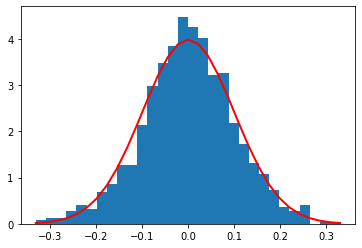

In [71]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density =True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

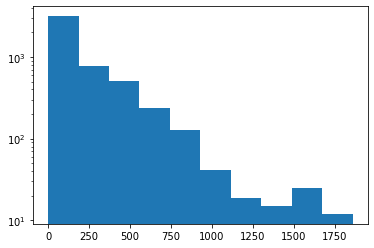

In [72]:
plt.hist(df1['e_prev_100k'], log = True)
plt.show() 

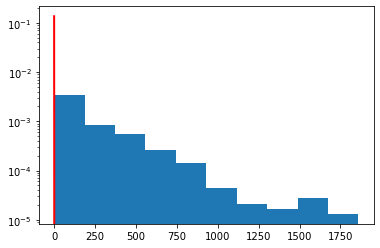

In [88]:
count, bins, ignored = plt.hist(df1['e_prev_100k'], density =True,log = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [89]:
exog = sm.add_constant(data.exog)
mod_fit = sm.OLS(data.endog, exog).fit()
res = mod_fit.resid # residuals


NameError: name 'sm' is not defined